
# Gráficos de entropía

Metamos los gráficos que necesitamos en esta notebook

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contrastes
import seaborn as sns


In [2]:
from contrastes.lists import add_info
from scipy.stats import entropy

df = contrastes.read_occurrence_dataframe("output/provinces_words.csv", filter_words=True)

add_info(df)

df["entropia_usuarios"] = df[df.cant_personas].apply(entropy, axis=1, raw=True)
df["entropia_palabras"] = df[df.cant_palabras].apply(entropy, axis=1, raw=True)

/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_palabras = cant_palabras
/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:148: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_personas = cant_personas


Calculating information values...
Calculating ranks...
Adding fnorms...


In [57]:
num_words = 20
top_palabras = df.sort_values("rank_palabras").index
top_personas = df.sort_values("rank_personas").index
top_palper = df.sort_values("rank_palper").index

rank = list(range(1, len(top_palper)+1))
table = pd.DataFrame({
    "palabras": top_palabras, 
    "personas": top_personas, 
    "mixed": top_palper}, index=rank)

table[["palabras", "personas", "mixed"]][:20]
#print(table[["palabras", "personas", "mixed"]][:20].to_latex())

,palabras,personas,mixed
1,ushuaia,chivil,chivilcoy
2,rioja,ush,ush
3,chivilcoy,poec,tolhuin
4,bragado,malpegue,blv
5,viedma,aijue,chivil
6,logroño,tolhuin,logroño
7,chepes,vallerga,bragado
8,oberá,yarca,vallerga
9,cldo,blv,breñas
10,tdf,portho,malpegue


Como podemos observar en la tabla, la mayoría de las palabras son topónimos (Ushuaia-ush, fsa (Formosa),Chivilcoy, tdf, boliches bailables como kraka y wika ) gentilicios (riojanos, fueguinos) o refieren a realidades provinciales (POEC, `Período de Orientación y Evaluación Complementaria`). Algunas palabras, sin embargo, guardan relevancia lexicográfica: 

- `aijue`
- `sinf`
- `cldo`
- `yarca`/`yarco`
- `bombola`
- `malpegue`


A su vez, la aparición de ciertas palabras como Logroño (ciudad de La Rioja, España) indica que muchos usuarios de dicha ciudad de España han indicado incorrectamente que están en La Rioja, pero de Argentina

In [4]:

table[["palabras", "personas", "mixed"]][100:121]

,palabras,personas,mixed
101,malal,ndeee,cldos
102,ibarreta,refsa,jei
103,coplera,fueguino,argel
104,nae,veril,fne
105,cdelu,noxxx,trapani
106,gyt,emsa,riojana
107,agraden,malpegada,melella
108,chosma,bevono,yarcos
109,olta,olta,bnz
110,fsa,chenque,lerma


## Entropía distribucional por palabras y usuarios

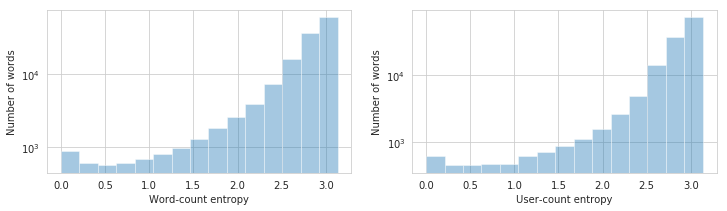

In [18]:
plt.rcParams["figure.figsize"] = (12,3)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2)

g = sns.distplot(df["entropia_palabras"], bins=15, kde=False, ax=axes[0])
g.semilogy()
g.set_xlabel("Word-count entropy")
g.set_ylabel("Number of words")
g.grid(True)

g = sns.distplot(df["entropia_usuarios"], bins=15, kde=False, ax=axes[1])
g.set_xlabel("User-count entropy")
g.set_ylabel("Number of words")
g.semilogy()

g.grid(True)


In [27]:
%%capture
plt.rcParams["figure.figsize"] = (6,3)

g = sns.distplot(df["entropia_palabras"], bins=15, kde=False)
g.semilogy()
g.set_xlabel("Word-count entropy")
g.set_ylabel("Number of words")
g.grid(True)

g.figure.savefig("../output/figures/word_count_entropy.png", bbox_inches='tight')



In [29]:
%%capture
plt.rcParams["figure.figsize"] = (6,3)

g = sns.distplot(df["entropia_usuarios"], bins=15, kde=False)
g.set_xlabel("User-count entropy")
g.set_ylabel("Number of words")
g.semilogy()
g.grid(True)


g.figure.savefig("../output/figures/user_count_entropy.png", bbox_inches='tight')

# Gráficos de Entropía + Posición 

Los colores de los gráficos los vamos a calcular sobre los logaritmos del ranking, ya que no nos interesa demasiado la diferencia entre números grandes de ranking (20 mil y 25 mil son casi lo mismo) pero sí entre valores chiquitos...

In [30]:


df["norm_palabra"] = np.log(df.cant_palabra)
df["norm_palabra"] /= df["norm_palabra"].max()

df["norm_personas"] = np.log(df.cant_usuarios)
df["norm_personas"] /= df["norm_personas"].max()

df["log_rank_personas"] = np.log(df.rank_personas)
df["log_rank_palabras"] = np.log(df.rank_palabras)
df["log_rank_palper"] = np.log(df.rank_palper)

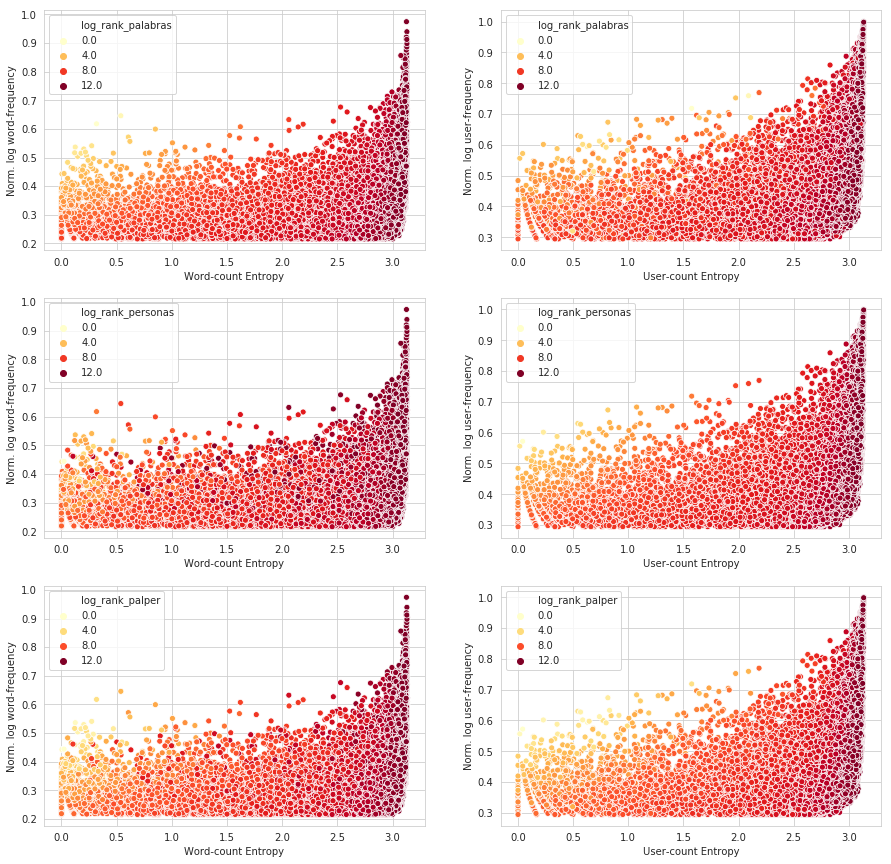

In [56]:
plt.rcParams["figure.figsize"] = (15,15)

sample_df = df.sample(frac=0.5)

fig, axes = plt.subplots(3, 2)

labels = {
    "entropia_palabras": "Word-count Entropy",
    "norm_palabra": "Norm. log word-frequency",
    "entropia_usuarios": "User-count Entropy",
    "norm_personas": "Norm. log user-frequency",
}

def my_scatter(data, x, y, ax, hue, **kwargs):
    g = sns.scatterplot(
        x=x, y=y, data=data, hue=hue, 
        palette="YlOrRd", legend='brief', ax=ax)
    #plt.scatter(data[x], data[y], c=-data[hue])
    g.set_xlabel(labels[x])
    g.set_ylabel(labels[y])
    

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_palabras", ax=axes[0][0])
my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_palabras", ax=axes[0][1])

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_personas", ax=axes[1][0])
my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_personas", ax=axes[1][1])


my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_palper", ax=axes[2][0])
my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_palper", ax=axes[2][1])


In [42]:
df["diff_rank"] = abs(df.log_rank_palabras - df.log_rank_personas)
df["use_ratio"] = df.cant_palabra / df.cant_usuarios

In [44]:
pd.options.display.max_rows = 100
    
df_diff_sorted = df.sort_values("diff_rank", ascending=False) 
df_diff_sorted[
    ["rank_palabras", "rank_personas", "cant_usuarios", "cant_palabra", "use_ratio"]
][:100]

,rank_palabras,rank_personas,cant_usuarios,cant_palabra,use_ratio
palabra,,,,,
rioja,2.0,2499.0,4017,62060,15.449340
vto,27.0,28179.5,42,3207,76.357143
hoa,81.0,83717.0,102,3706,36.333333
contextos,88.0,71290.0,194,3022,15.577320
cardi,32.0,23756.5,31,2671,86.161290
agraden,107.0,75042.0,32,1170,36.562500
hemmings,59.0,40227.0,52,2637,50.711538
ushuaia,1.0,565.0,2567,38316,14.926373
tweeted,43.0,21342.0,31,2283,73.645161


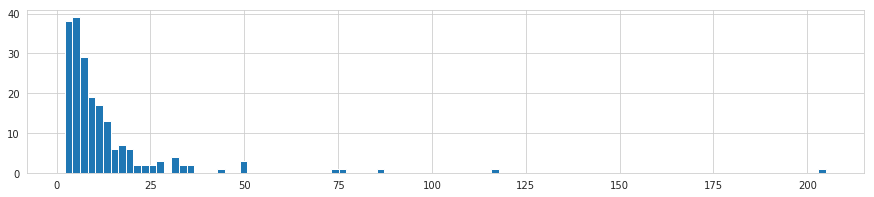

In [55]:
df_diff_sorted[:200].use_ratio.hist(bins=100)

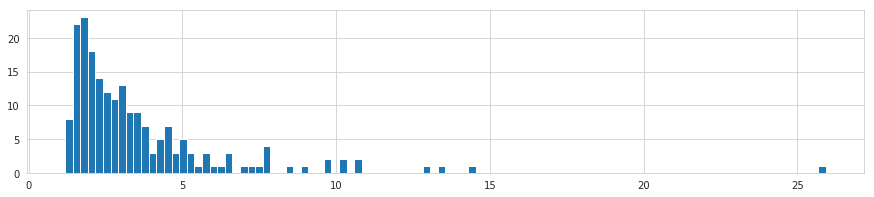

In [54]:
df_pers_sorted = df.sort_values("rank_personas")

df_pers_sorted[:200].use_ratio.hist(bins=100)

In [9]:
g.figure.savefig("../output/figures/entropy_log_rank.png", bbox_inches='tight')

## Gráfico de Information Value

Volvemos a cargar el dataset para cargar todas las palabras.

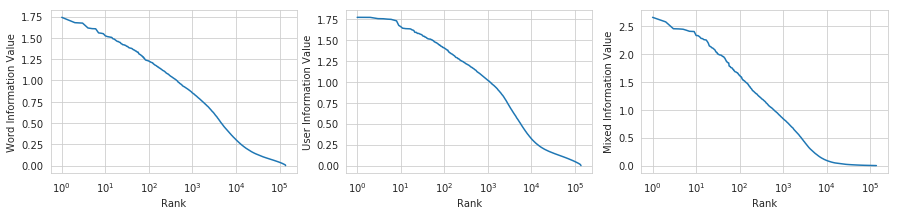

In [10]:
plt.rcParams["figure.figsize"] = (15, 3)
fig, axes = plt.subplots(1, 3)

def decay_plot(df, base, ax=None, label=None, threshold=1e7):
    
    rank = "rank_" + base
    ival = "ival_" + base
    reduced_df = df[df[rank] < threshold].copy()
    reduced_df.sort_values(rank, ascending=True, inplace=True)
    reduced_df.plot(x=rank, y=ival, logx=True, ax=ax, legend=False)
    
    ax.set_xlabel("Rank")
    ax.set_ylabel(label)
    
decay_plot(df, "palabras", ax=axes[0], label="Word Information Value")
decay_plot(df, "personas", ax=axes[1], label="User Information Value")
decay_plot(df, "palper", ax=axes[2], label="Mixed Information Value")

In [11]:
fig.savefig("../output/figures/information_value_decay.png", bbox_inches='tight')